# Avec des classes

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

On définit une interface "compute", qui permet de calculer la valeur d'un fonction au point "x" (ça pourrait être un vecteur aussi si on veut, ou un complexe, voir même des matrice...).

Le tout est d'avoir une classe qui représente une opération mathématique, et une méthode "compute" associée qui permet d'évaluer la fonction en un point donné
    

In [2]:
class Opération_de_la_mort:
    def __init__(self, a, b, c, d):
        # ici on stocke les paramètres de la fonction (on ne calcule rien pour le moment)
        self.a = a
        self.b = b
        #...
        
    def compute(self, x):
        '''On évalue la fonction en "x"'''
        return calcul_de_la_mort(x)


In [3]:
class Constant:
    '''Un classe qui calcule des constantes'''
    def __init__(self, c):
        # on stocke juste la valeur
        self.c = c
        
    def compute(self, x):
        # la constante est invariante par rapport à x
        return self.c
    
    def __str__(self):
        # pour avoir un affichage: print(Constant(3.14)), permet aussi d'utiliser "str()" sur notre classe
        # exemple: print("toto " + str(Constant(10)))
        return str(self.c)
    def __repr__(self):
        # pour l'affichage dans des listes : print([Constant(1), Constant(25)])
        # on réutilise simplement "__str__"
        return str(self)

In [4]:
# exemple d'utilisation
c10 = Constant(10)  # création de la constante
print(c10)          # affichage (uniquement texte, pas de calcul)

val = c10.compute(42)  # on évalue la fonction en x=42, c'est à dire toujours 10.
print(val)

# affichage d'une liste
l = [Constant(1), Constant(2)]
print(l)

10
10
[1, 2]


In [5]:
# example de vrai calcul
class Sin:
    def __init__(self, inner):
        # on calcule sin de qq chose, mais on ne sait pas quoi.
        # Ça peut être une constante (type Constant), comme un truc plus complexe.
        # on sait juste que ce truc est "computable" en un point x quelconque
        self.inner = inner
        
    def compute(self, x):
        # on ne peut pas faire :
        # return math.sin(self.inner)
        # car self.inner n'est pas un nombre. C'est juste un "truc" qui a une méthode "compute"
        return math.sin(self.inner.compute(x))
    
    def __str__(self):
        # là aussi c'est un peu plus chaud. 
        # On ne peut pas faire: return "sin(" + self.inner + ")"
        # car self.inner n'est pas affichable, il faut 
        return "sin(" + str(self.inner) + ")"
    def __repr__(self):
        return str(self)


sin_10 = Sin(Constant(10))
val = sin_10.compute(0)   # on calcule sin(10) en x=0
print(str(sin_10) + " = " + str(val))
#     ^^^^^^^^^^^          ^^^^^^^^
#     affichage de         affichage de la valeur de l'expression 
#     l'expression

print(sin_10.compute(39.5))  # on calcule le sin d'une constante, donc c'est toujours pareil

sin(10) = -0.5440211108893698
-0.5440211108893698


In [6]:
class Monomial:
    # a.x^b
    def __init__(self, a, b):
        # ici, coeff et power sont des entier/réels, donc pas besoin de faire de a.compute()
        # sinon ça ne serait plus un monome de toutes façons
        self.a = a
        self.b = b
        
        # si on dit que a et b sont des fonctions de x, ça donne :
        # a(x) * x ^ b(x)
        # ce qui est aussi possible en théorie

    def compute(self, x):
        # du coup le calcul est plus simple (pas de a.compute(x))
        return self.a * x ** self.b
    
    def __str__(self):
        return str(self.a) + " * x ^ " + str(self.b)
    def __repr__(self):
        return str(self)



In [7]:
m1 = Monomial(1, 1)  # m1 = 1.x^1 = x
print(m1)
print(str(m1) + "=" + str(m1.compute(20)))  # = 1 * 20^1

m2 = Monomial(0.5, 3)  # m2 = 0.5 x^3
print(m2.compute(3))

1 * x ^ 1
1 * x ^ 1=20
13.5


In [8]:
class Sum:
    def __init__(self, terms):
        # ça peut représenter un polynome
        # on passe en param une liste de monomes: Sum([Monomial(1, 2), Monomial(3, 4), ...])
        self.terms = terms
        
    def compute(self, x):
        total = 0
        for term in self.terms:
            val = term.compute(x)      # valeur d'un seul terme
            total += val                   # on ajoute au total
        return total

    def __str__(self):
        out = ""
        for term in self.terms:
            out += str(term)     # on concatène terme par terme
            out += " + "             # on ajoute "+" entre chaque
            
        # oups on ajouté aussi un " + " en trop à la fin, il faut le virer (avec les 2 espaces de chaque côté)
        out = out[:-3]
        return out
    def __repr__(self):
        return str(self)

In [9]:
f1 = Sum([Monomial(1, 0)])  # avec un seul terme : 1 * x^0 = 1 (donc identique à Constant(1) au final !)
print(f1)
print(f1.compute(0))

1 * x ^ 0
1


In [10]:
# un vrai polynome cette fois
f2 = Sum([Monomial(1, 2), Monomial(-1, 1)])  # x^2 - x
print(f2)
print(f2.compute(0.5))

1 * x ^ 2 + -1 * x ^ 1
-0.25


In [11]:
X = np.arange(-10, 10, 0.1)
Y = [f2.compute(x) for x in X]  # je sais pas comment faire plus joli que ça

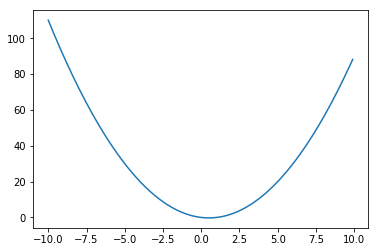

In [12]:
plt.plot(X, Y)

1 * x ^ 1 + sin(1 * x ^ 1) + -0.2 * x ^ 2


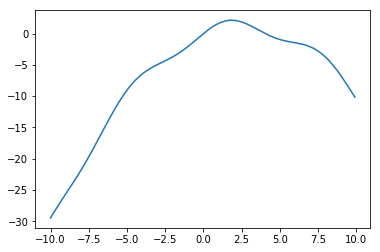

In [13]:
f = Sum([Monomial(1, 1), Sin(Monomial(1, 1)), Monomial(-0.2, 2)])
print(f)

X = np.arange(-10, 10, 0.1)
Y = [f.compute(x) for x in X]

plt.plot(X, Y)

$$ fano = \frac{A(q.\Gamma+2*(x-x0))}{(\Gamma^2+4*(x-x0)^2)} $$
ouch ça fait peur ça

In [14]:
class Fano:
    def __init__(self, A, q, gamma, x0):
        self.A = A
        self.q = q
        self.gamma = gamma
        self.x0 = x0
    
    def compute(self, x):
        # je ne pense pas que les paramètres varient avec x, si c'est le cas, il faut changer en  self.q.compute(x)
        num = self.q * self.gamma + 2 * (x - self.x0)
        denom = self.gamma**2 + 4*(x-self.x0)**2
        return self.A*(num**2/denom)

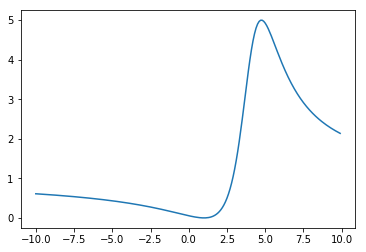

In [15]:
fano1 = Fano(1, 2, 3, 4)
X = np.arange(-10, 10, 0.1)
Y = [fano1.compute(x) for x in X]

plt.plot(X, Y)

# En formel maintenant

In [16]:
from sympy import sqrt, pi, N, symbols, lambdify

In [17]:
x = sqrt(pi)
print(x)      # l'affichage est géré de base
print(N(x))   # N permet de faire une approximation

sqrt(pi)
1.77245385090552


In [18]:
# définition des variables, pour l'instant elles n'ont pas valeur
A, q, gamma, x0, x = symbols('A q gamma x0 x')

# on construit le fano (pareil, pas de valeur pour le moment)
num = q * gamma + 2 * (x - x0)
denom = gamma ** 2 + 4 * (x - x0) ** 2
fano = A * (num ** 2 / denom)


# pas besoin de créer de classe
print(fano)


A*(gamma*q + 2*x - 2*x0)**2/(gamma**2 + 4*(x - x0)**2)


In [19]:
# on peut fixer les paramtres
fano_1_2_3_4 = fano.subs({A:1, q: 2, gamma: 3, x0: 4})
print(fano_1_2_3_4)

(2*x - 2)**2/(4*(x - 4)**2 + 9)


In [20]:
# j'ai pas trop compris, ya 2 manière de calculer une valeur... evalf ne marche pas pour faire des graphes, alors que lambdify oui

val = fano_1_2_3_4.evalf(subs={x: 0})
print(val)

val2 = lambdify(x, fano_1_2_3_4)(0)
print(val2)

0.0547945205479452
0.0547945205479452


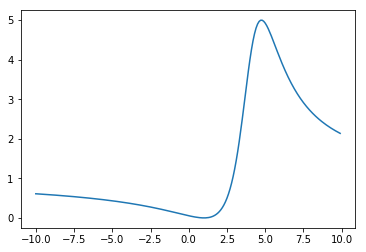

In [21]:
fano_1_2_3_4_lambda = lambdify(x, fano_1_2_3_4)

X = np.arange(-10., 10., 0.1)
Y = [fano_1_2_3_4_lambda(x) for x in X]    # avec evalf à la place de lambdify, ça ne marche pas

plt.plot(X, Y)